# Finding the most Luminous Stars by using Stefan-Boltzmann law.

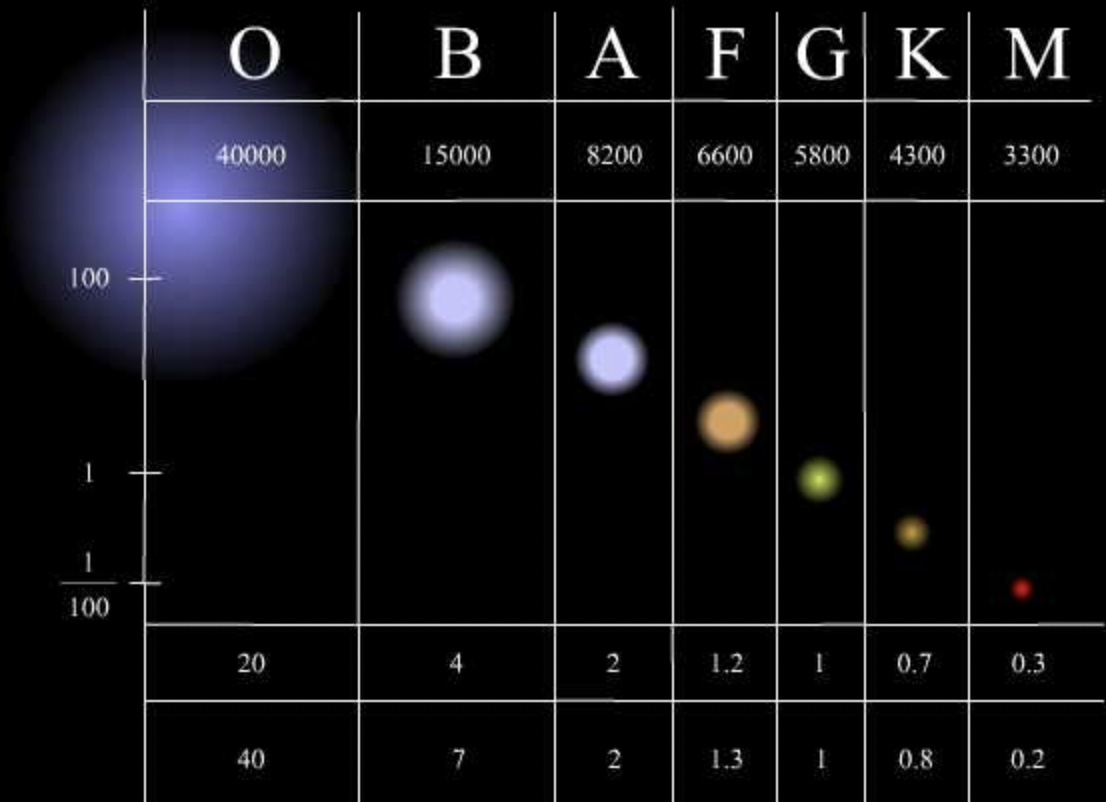

In [3]:
from math import pi
from scipy.constants import sigma # Stefan-Boltzmann constant

def luminosity(R, Teff):
    """
    computes luminosity of a star
    using the Stefan-Boltzmann law

    args:
    R - radius in m
    Teff - effective temperature in K

    returns: luminosity in W
    """
    A = 4*pi * R**2 # local variable for surface area
    return A * sigma * Teff**4

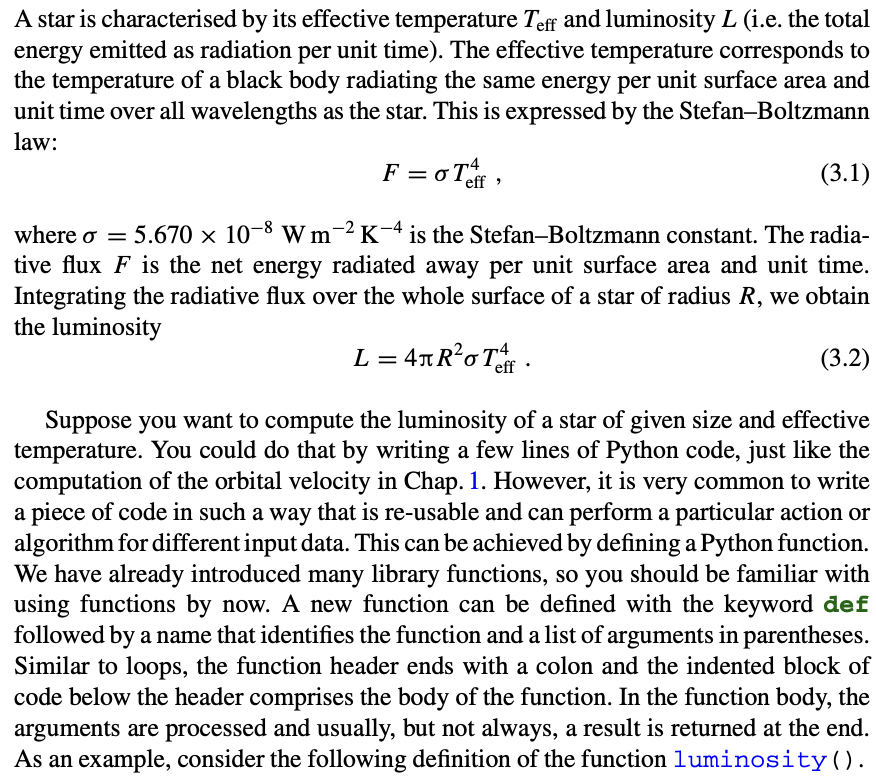

In [4]:
help(luminosity)

Help on function luminosity in module __main__:

luminosity(R, Teff)
    computes luminosity of a star
    using the Stefan-Boltzmann law
    
    args:
    R - radius in m
    Teff - effective temperature in K
    
    returns: luminosity in W



In [5]:
from astropy.constants import R_sun, L_sun

Teff_sun = 5778 # effective temperature of the Sun in K 
print("Solar luminosity:")

# compute luminosity of the Sun
L_sun_sb = luminosity(R_sun.value, 5778)
print("\t{:.3e} W (Stefan-Boltzmann law)".format(L_sun_sb))

# solar luminosity from astropy
print("\t{:.3e} ({:s})".format(L_sun,L_sun.reference))

Solar luminosity:
	3.844e+26 W (Stefan-Boltzmann law)
	3.828e+26 W (IAU 2015 Resolution B 3)


In [6]:
from astropy.constants import R_sun, L_sun, sigma_sb
import astropy.units as unit

def luminosity(R, Teff):
    """
    function computes luminosity of star
    using the Stefan-Boltzmann law with units

    args: dimensinoal variables based on astropy.units
    R - radius
    Teff - effective temperature

    returns: luminosity
    """
    A = 4*pi * R**2 # local variable for surface area
    return sigma_sb * A * Teff**4

Teff_sun = 5778*unit.K 
# compute luminosity from dimensional variables
L_sun_sb = luminosity(R_sun, Teff_sun)
print("\t{:.3e} (Stefan-Boltzmann law)".format(L_sun_sb))

	3.844e+26 W (Stefan-Boltzmann law)


In [7]:
# convert from W to erg/s
print("\t{:.3e} (Stefan-Boltzmann law)".
format(L_sun_sb.to(unit.erg/unit.s)))

	3.844e+33 erg / s (Stefan-Boltzmann law)


In [8]:
# compute luminosity with solar radius in km
# Solar radius is a unit of distance used to express the size of stars in astronomy relative to the Sun.
#The solar radius is usually defined as the radius to the layer in
#the Sun's photosphere where the optical depth equals 2/3.
# Wiki - https://en.wikipedia.org/wiki/Solar_radius

L_sun_sb = luminosity(6.957e5*unit.km, Teff_sun)
print("\t{:.3e} (Stefan-Boltzmann law)". format(L_sun_sb.to(unit.W)))

	3.844e+26 W (Stefan-Boltzmann law)


In [9]:
print("\t{:.3e} (Stefan-Boltzmann law)". format(L_sun_sb.to(unit.W)))

	3.844e+26 W (Stefan-Boltzmann law)


In [10]:
def stellar_parameters(*args): 
    '''
    auxiliary function to create a dictionary
    of stellar parameters in SI units
    args: (radius, effective temperature) 
    '''
    return { "R" : args[0].to(unit.m),
             "Teff" : args[1].to(unit.K) }
# dictionary of some stars
stars = {
    'Bernard\'s Star' :
        stellar_parameters(0.196*R_sun, 3.13e3*unit.K),
    'Sirius A' :
        stellar_parameters(1.711*R_sun, 9.94e3*unit.K),
    'Sirius B' :
        stellar_parameters(5.8e3*unit.km, 2.48e4*unit.K),
    'Arcturus' :
        stellar_parameters(25.4*R_sun, 4.29e3*unit.K),
    'Betelgeuse' :
        stellar_parameters(6.4e8*unit.km, 3.59e3*unit.K)
}
print("Luminosities of stars (relative to solar luminosity):") 
for name in stars:
    stars[name]['L'] = \
        luminosity(stars[name]['R'], stars[name]['Teff'])
    print("\t{:15s} {:.1e} ({:.1e}) ".format(name,stars[name]['L'], stars[name]['L']/L_sun))
    
# Betelgeuse      4.8e+31 W (1.3e+05) is the most luminous object.    

Luminosities of stars (relative to solar luminosity):
	Bernard's Star  1.3e+24 W (3.3e-03) 
	Sirius A        9.9e+27 W (2.6e+01) 
	Sirius B        9.1e+24 W (2.4e-02) 
	Arcturus        7.5e+28 W (2.0e+02) 
	Betelgeuse      4.8e+31 W (1.3e+05) 


Relative Luminousity of the given list of stars.!!!!!!!